<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# **IBM Statistics for Data Science with Python final assessment**
***
## Project Case Scenario
Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

* Is there a significant difference in the median value of houses bounded by the Charles river or not?
* Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
* Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
* What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 
***
## Becoming familiar with the dataset
The following describes the dataset variables:

*      CRIM - per capita crime rate by town

*      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

*      INDUS - proportion of non-retail business acres per town.

*      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

*      NOX - nitric oxides concentration (parts per 10 million)

*      RM - average number of rooms per dwelling

*      AGE - proportion of owner-occupied units built prior to 1940

*      DIS - weighted distances to five Boston employment centres

*      RAD - index of accessibility to radial highways

*      TAX - full-value property-tax rate per $10,000

*      PTRATIO - pupil-teacher ratio by town

*      LSTAT - % lower status of the population

*      MEDV - Median value of owner-occupied homes in $1000's
***

#Import Libraries

In [46]:
import scipy
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load the dataset

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url, index_col=0)

***
## Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels.

Generate the following and explain your findings:
* For the "Median value of owner-occupied homes" provide a boxplot
* Provide a  histogram for the Charles river variable
* Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
* Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
* Create a histogram for the pupil to teacher ratio variable
***

For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median value of owner-occupied homes boxplot')

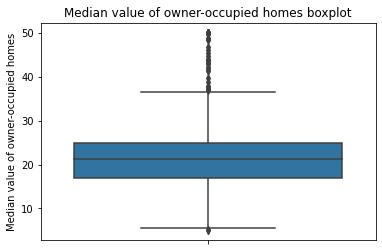

In [14]:
ax = sns.boxplot(y=boston_df['MEDV'])
ax.set_ylabel('Median value of owner-occupied homes')
ax.set_title('Median value of owner-occupied homes boxplot')

Provide a histogram for the Charles river variable

Text(0.5, 1.0, 'Histogram for the Charles river variable')

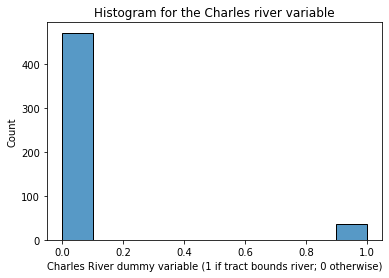

In [19]:
ax = sns.histplot(boston_df['CHAS'])
ax.set_xlabel('Charles River dummy variable (1 if tract bounds river; 0 otherwise)')
ax.set_title('Histogram for the Charles river variable')

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'Median value of owner-occupied homes boxplot with age groups')

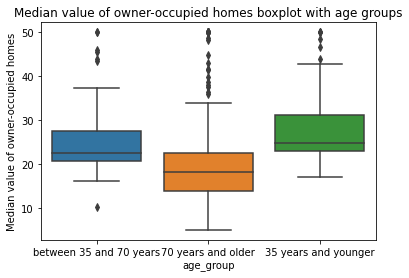

In [22]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
ax.set_ylabel('Median value of owner-occupied homes')
ax.set_title('Median value of owner-occupied homes boxplot with age groups')

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

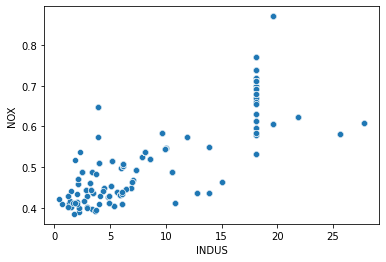

In [24]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Nitric oxides concentration (parts per 10 million)')
ax.set_title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
# The plot shows a positive relationship. When the INDUS increases, NOX tends to increase as well.

Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')

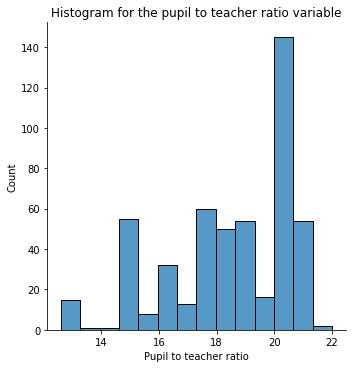

In [29]:
fg = sns.displot(boston_df['PTRATIO'])
fg.axes[0,0].set_xlabel('Pupil to teacher ratio')
fg.axes[0,0].set_title('Histogram for the pupil to teacher ratio variable')

***
## Use the appropriate tests to answer the questions provided.
For each of the following questions;

* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:
1. State your hypothesis.
2. Use α = 0.05
3. Perform the test Statistics.
4. State the conclusion from the test.
***

In [30]:
alpha = 0.05

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis:
*   $H\_0: µ\_1 = µ\_2$ The two population means are equal
*   $H\_1:$ At least one of the means differ

In [37]:
# Test if there is an equality of variance
levene = scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                           boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                           center='mean')

# We automate the hypothesis testing. For this test, we receive a p-value of 0.003. 
# This value is lower than the significance level. Therefore, we reject the null hypothesis that the two variables have equal variances.
equality_of_variance = True if levene[1] > alpha else False
print(f'Can we assume equal variance? {equality_of_variance}. p-value: {levene[1]}')

# Perform the T-test for independent samples
Ttest_indResult = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = equality_of_variance)

print(f'T-statistic: {Ttest_indResult[0]}. p-value: {Ttest_indResult[1]}')

Can we assume equal variance? False. p-value: 0.003238119367639829
T-statistic: 3.113291312794837. p-value: 0.003567170098137517


**Conclusion:** The p-value (0.004) is lower than the significance level. Therefore, we will reject the null hypothesis as there is a significant difference between the house prices by the Charles river or not.
***

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis:

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

In [43]:
thirtyfive_younger = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

# Test if there is an equality of variance
levene = scipy.stats.levene(thirtyfive_younger, 
                            thirtyfive_seventy,
                            seventy_older,                   
                            center='mean')

# We automate the hypothesis testing. For this test, we receive a p-value of 0.06. 
# This value is higher than the significance level. Therefore, we fail to reject the null hypothesis that the two variables have equal variances.
equality_of_variance = True if levene[1] > alpha else False
print(f'Can we assume equal variance? {equality_of_variance}. p-value: {levene[1]}')

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_younger, 
                                            thirtyfive_seventy, 
                                            seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))


Can we assume equal variance? True. p-value: 0.06295337343259205
F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.
***

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town


Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot. We already have performed this task above. There, we noticed an upward trend.

In [45]:
r_2, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'R-squared: {r_2}. p-value: {p_value}')

R-squared: 0.7636514469209154. p-value: 7.913361061236894e-98


**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  beauty and teaching evaluation score.
***

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis:

*   $H\_0:$ The weighted distance  to the five Boston employment centres is independent of median value of owner occupied homes
*   $H\_1:$ The weighted distance  to the five Boston employment centres is associated with median value of owner occupied homes

In [51]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 18 Nov 2021   Prob (F-statistic):           1.21e-08
Time:                        13:17:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of correlation between weighted distance to the five Boston employment centres and median value of owner occupied homes. The relation is slightly positive, as the R-squared value is 0.062.